# ElasticNet Regression 
1. ElasticNet combines both:
    1. Lasso (L1) → Shrinks some coefficients to zero (feature selection)
    2. Ridge (L2) → Shrinks all coefficients but keeps them non-zero

2. 🎯 It’s useful when:
     1. You have many features
     2. Some are correlated
     3. You want sparsity and stability


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [11]:
# Step : 1 Load data 
df = fetch_california_housing()
dataset = pd.DataFrame(df.data)


In [13]:
dataset.columns = df.feature_names

In [15]:
# Step 2: Define Independent x and Dependent y
x = dataset
y = df.target

In [17]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [19]:
# Step 3: Split the data into Traing and Testing 
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [23]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [25]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
17505,2.9545,47.0,4.195833,1.020833,581.0,2.420833,37.36,-121.90
13512,1.4891,41.0,4.551852,1.118519,994.0,3.681481,34.11,-117.32
10842,3.5120,16.0,3.762287,1.075614,5014.0,2.369565,33.67,-117.91
16559,3.6500,10.0,5.502092,1.060371,5935.0,3.547519,37.82,-121.28


In [31]:
#Step 4: Standardize The features
from sklearn.preprocessing import StandardScaler
# Scaler object create
scaler = StandardScaler()

In [33]:
x_train = scaler.fit(x_train)
x_test = scaler.transform(x_test)

In [35]:
x_test

array([[-1.1526893 , -0.28346293, -0.50781822, ...,  0.06127763,
         0.19166399,  0.28664112],
       [-0.70640568,  0.11294728, -0.16252032, ..., -0.03551561,
        -0.23911452,  0.06196251],
       [-0.20830675,  1.85715216, -0.59546738, ..., -0.14215427,
         1.00639726, -1.42590916],
       ...,
       [-0.19155996, -0.99700129, -0.6830438 , ..., -0.06058827,
        -0.92742367,  0.8358555 ],
       [-0.11911302, -1.47269353,  0.02607207, ...,  0.03461374,
         1.01576201, -0.84673764],
       [-0.43304974, -0.91771925, -0.84872893, ..., -0.0407528 ,
        -0.70266966,  0.67109119]])

In [83]:
# Step 5: Create and train The Model Using ElasticNet Regression
from sklearn.linear_model import ElasticNet

#Create ElasticNet model (default alpha=1.0, l1_ratio=0.5)
ElasticNet_model = ElasticNet()  

# also we can change the regularization strength and L1/L2 balance:
#elastic_model = ElasticNet(aplha = 0.1, l1_ratio = 0.7)

In [85]:
#  Train the model 
'''
elastic_model.fit(X_train, y_train)
'''
# Method 2
#use GridSearchCV to tune both alpha and l1_ratio in ElasticNet Regression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


In [87]:
# Define Hyperparametrs to tune 

params = {'alpha': [0.01,0.1,3,40,5,17,10], 'l1_ratio':[0.1,0.2,0.3,0.4,0.7,1.0,0.9]}

In [97]:
# Perform GridSearchCV
grid = GridSearchCV(ElasticNet_model , params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 3, 40, 5, 17, 10],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.7, 1.0, 0.9]},
             scoring='neg_mean_squared_error')

In [101]:
# Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Score (negative MSE):", grid.best_score_)

# Use best model to predict
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test MSE:", mse)
print("Test R² Score:", r2)

Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.1}
Best Score (negative MSE): -0.5213285298565677
Test MSE: 0.5519035390263053
Test R² Score: 0.5788310762589679


In [59]:
# Step 6: Predict
y_pred = elastic_model.predict(X_test)

In [61]:
# Step 7: Evaluate
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [63]:
print("ElasticNet Mean Squared Error:", mse)
print("ElasticNet R² Score:", r2)

ElasticNet Mean Squared Error: 0.6358566879910775
ElasticNet R² Score: 0.5147647043408882


###  now create a heatmap to visualize how ElasticNet MSE changes with different alpha and l1_ratio values using Seaborn.

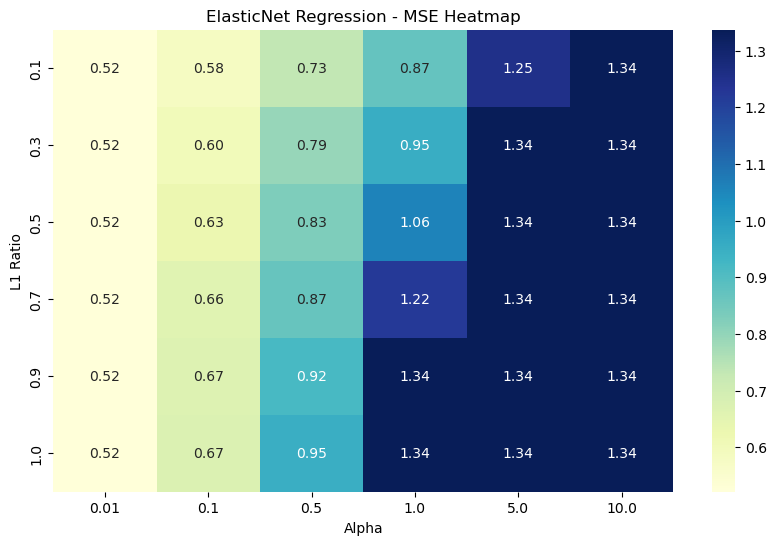

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load and split data
data = fetch_california_housing()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ElasticNet and GridSearch parameters
elastic = ElasticNet()
params = {
    'alpha': [0.01, 0.1, 0.5, 1, 5, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

# GridSearchCV
grid = GridSearchCV(elastic, params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Extract results
results = pd.DataFrame(grid.cv_results_)

# Convert to positive MSE
results['mean_test_score'] = -results['mean_test_score']

# Pivot table for heatmap
# Correct pivot table creation
pivot_table = results.pivot(index='param_l1_ratio', columns='param_alpha', values='mean_test_score')


# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("ElasticNet Regression - MSE Heatmap")
plt.xlabel("Alpha")
plt.ylabel("L1 Ratio")
plt.show()
